In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [4]:

df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


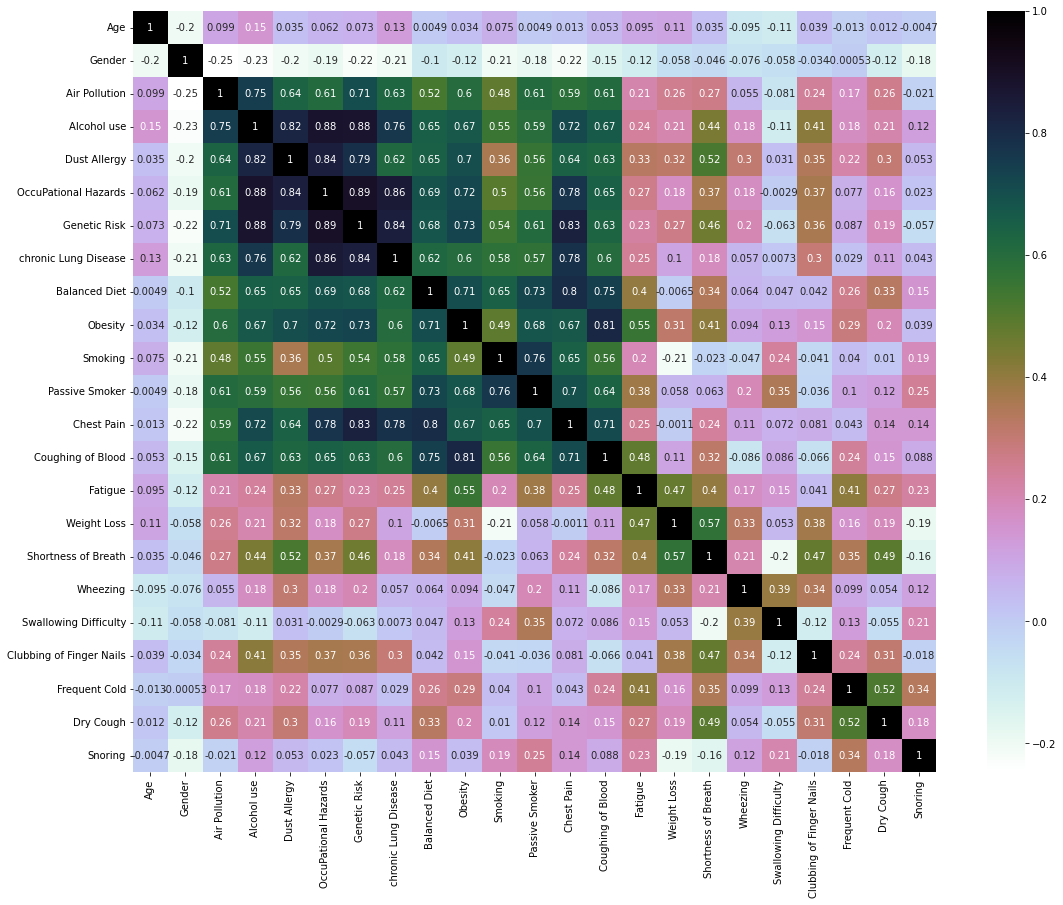

In [5]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
X = df.drop(columns='Level', axis =1)
Y = df['Level']

In [8]:
# training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 23) (800, 23) (200, 23)


In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
len(set(corr_features))


6

In [11]:
corr_features

{'Chest Pain',
 'Coughing of Blood',
 'Dust Allergy',
 'Genetic Risk',
 'OccuPational Hazards',
 'chronic Lung Disease'}

In [16]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [17]:
X_train

,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
492,24,2,1,2,2,3,2,1,1,1,1,2,3,4,5,2,1
99,29,2,4,5,6,7,2,3,8,7,9,2,1,4,6,7,2
328,33,1,6,7,6,7,7,7,8,5,7,6,7,8,7,6,2
817,27,1,3,1,4,3,1,4,3,2,2,4,2,2,3,4,3
101,38,2,2,1,2,4,1,4,6,7,2,5,8,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,24,2,1,2,2,3,2,1,1,1,1,2,3,4,5,2,1
267,42,1,2,1,2,1,1,1,1,1,1,2,1,2,3,1,2
319,28,1,6,7,7,7,7,8,5,3,2,7,8,2,4,5,3
959,62,1,6,8,2,4,1,2,2,7,6,5,1,9,3,4,2


In [18]:
X_test

,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
402,32,2,1,6,6,2,3,3,3,3,7,7,4,8,7,7,5
811,25,2,3,1,4,3,1,4,3,2,2,4,2,2,3,4,3
515,62,1,6,8,2,4,1,2,2,7,6,5,1,9,3,4,2
344,64,1,6,8,7,7,7,8,9,6,5,7,2,4,3,1,4
825,24,2,1,2,2,3,2,1,1,1,1,2,3,4,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,64,1,6,8,7,7,7,8,9,6,5,7,2,4,3,1,4
405,48,2,2,1,2,4,1,4,6,7,2,5,8,1,3,2,3
698,32,2,1,6,7,7,3,4,3,2,6,4,2,3,1,2,1
526,48,2,6,8,2,4,1,2,2,7,6,5,1,9,3,4,2


In [19]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
len(set(corr_features))

0

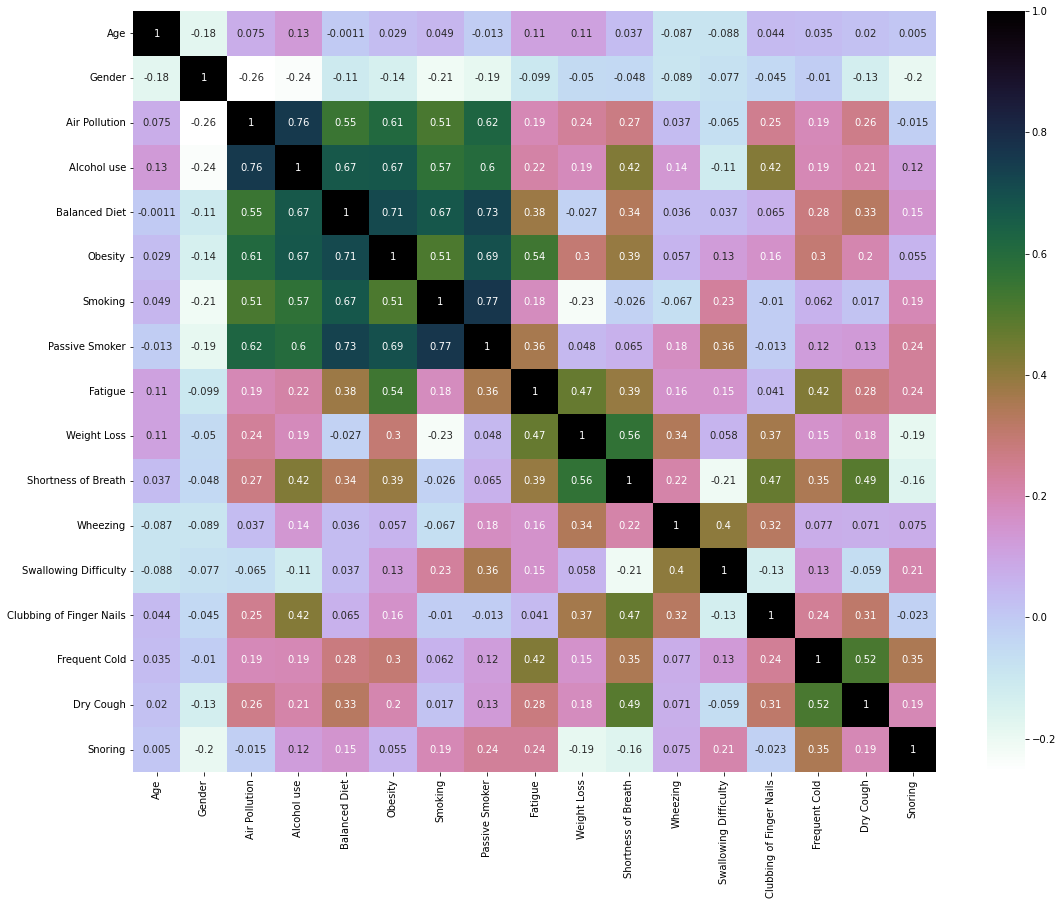

In [21]:
plt.figure(figsize=(18,14))
sns.heatmap(X_train.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

C:\Users\vedantkadam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  98.375


In [25]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  95.5


In [31]:

input_data = (62,1,6,8,7,7,8,7,3,2,4,1,4,2,4,2,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not LunG Cancer')
else:
  print('The Person has Lung Cancer Disease')

['High']
The Person has Lung Cancer Disease


C:\Users\vedantkadam\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
Y_test

402    Medium
811       Low
515    Medium
344      High
825       Low
        ...  
233      High
405    Medium
698    Medium
526    Medium
799      High
Name: Level, Length: 200, dtype: object